In [ ]:
# AQUÍ REPITO EL MODELO RANDOM FOREST (QUE ES EL QUE MEJOR FUNCIONA DE MOMENTO) SIN OUTLIERS 
# LA CONCLUSION ES QUE NO VALE LA PENA HACER ESTE AJUSTE, AL  COMPARARLO EL RESULTADO 
# OBTENIDO EN 'ARCHIVO AGUACATE'

In [9]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv(r'C:\Users\enriq\OneDrive\Escritorio\curso\alumno\prueba Machine Learning\proyecto Aguacate\src\data\avocado.csv')
df =  df.drop(columns='Unnamed: 0')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Len original: 18249
Len sin outliers en depth: 18040


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AveragePrice', ylabel='AveragePrice'>

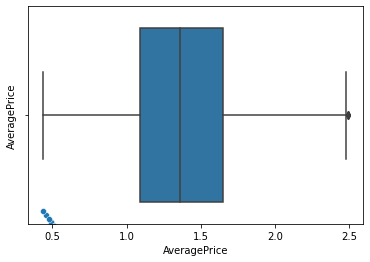

In [12]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df2 = outliers_quantie(df, 'AveragePrice')
print("Len original:", len(df))
print("Len sin outliers en depth:", len(df2))
sns.scatterplot(data=df2, x='AveragePrice', y='AveragePrice');
sns.boxplot(df2['AveragePrice'])

c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Len original: 18040
Len sin outliers en depth: 15536
AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:xlabel='AveragePrice', ylabel='AveragePrice'>

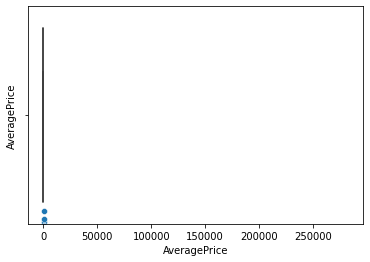

In [13]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df3 = outliers_quantie(df2, '4046')
print("Len original:", len(df2))
print("Len sin outliers en depth:", len(df3))
print(sns.scatterplot(data=df3, x='4046', y='AveragePrice'))
sns.boxplot(df3['AveragePrice'])

Len original: 15536
Len sin outliers en depth: 11894
AxesSubplot(0.125,0.125;0.775x0.755)


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

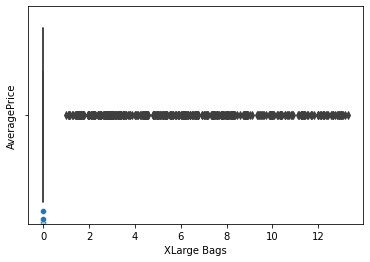

In [14]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df4 = outliers_quantie(df3, 'XLarge Bags')
print("Len original:", len(df3))
print("Len sin outliers en depth:", len(df4))
print(sns.scatterplot(data=df4, x='XLarge Bags', y='AveragePrice'))
sns.boxplot(df4['XLarge Bags'])

In [17]:
X = df4.drop(columns=['AveragePrice', ])
y=df4['AveragePrice']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [ ]:
y_pred_train= model.predict(X_train)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error, explained_variance_score, r2_score, mean_absolute_percentage_error

print('el mae es:', mae(y_test, y_pred) )
print( 'el mean_squared_error es', mean_squared_error(y_test, y_pred))
print('el score en test es:', r2_score(y_test, y_pred) )
print('el score en train es:', model.score(X_train, y_train))
print('el % mae es:', mean_absolute_percentage_error(y_test, y_pred) )

el mae es: 0.17102164775115594
el mean_squared_error es 0.05205195237074401
el score en test es: 0.6053779678532571
el score en train es: 0.9442874794860202
el % mae es: 0.12130046265911901


In [20]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

In [21]:
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')